### name: Ranjani B
### roll number: 215229131
### PERSONALITY  PREDICTION USING Myer Briggs Type Indicator (MBTI) method

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from nltk.stem.porter import PorterStemmer 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 

stemmer=PorterStemmer()
df = pd.read_csv('mbti_1 4.csv')

In [2]:
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


### preprocessing starts

In [4]:
def cleanText(text):
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', '', text)
    text = text.replace("|||"," ")
    text=text.lower()
    text = re.sub(r"http\S+", "", text, flags=re.MULTILINE)

    return text


In [5]:
df['posts'] = df['posts'].apply(cleanText)
df.head()

,type,posts
0,INFJ,' enfp and intj moments sportscenter not t...
1,ENTP,'i'm finding the lack of me in these posts ver...
2,INTP,"'good one _____ of course, to which i say ..."
3,INTJ,"'dear intp, i enjoyed our conversation the o..."
4,ENTJ,'you're fired. that's another silly misconcept...


In [6]:
df.dtypes


type     object
posts    object
dtype: object

In [7]:
dist = df['type'].value_counts()
dist

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

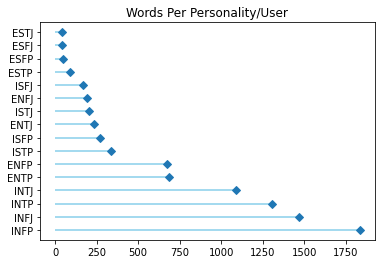

In [8]:
plt.hlines(y=list(range(16)), xmin=0, xmax=dist, color='skyblue')
plt.plot(dist, list(range(16)), "D")
plt.title("Words Per Personality/User")
plt.yticks(list(range(16)), dist.index)
plt.show()

In [9]:
df.shape

(8675, 2)

In [10]:
from bokeh.io import output_file, show
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [11]:
#Dividing the 16 personalities into 4 major groups for ease
map1 = {"I": 0, "E": 1}
map2 = {"N": 0, "S": 1}
map3 = {"T": 0, "F": 1}
map4 = {"J": 0, "P": 1}
df['I-E'] = df['type'].astype(str).str[0]
df['I-E'] = df['I-E'].map(map1)
df['N-S'] = df['type'].astype(str).str[1]
df['N-S'] = df['N-S'].map(map2)
df['T-F'] = df['type'].astype(str).str[2]
df['T-F'] = df['T-F'].map(map3)
df['J-P'] = df['type'].astype(str).str[3]
df['J-P'] = df['J-P'].map(map4)
df['http_per_comment'] = df['posts'].apply(lambda x: x.count('http')/50)
df['music_per_comment'] = df['posts'].apply(lambda x: x.count('music')/50)
df['question_per_comment'] = df['posts'].apply(lambda x: x.count('?')/50)
df['img_per_comment'] = df['posts'].apply(lambda x: x.count('jpg')/50)
df['excl_per_comment'] = df['posts'].apply(lambda x: x.count('!')/50)
df['ellipsis_per_comment'] = df['posts'].apply(lambda x: x.count('...')/50)

In [12]:
#Building ML on 'type' column 
X = df.drop(['type','posts','I-E','N-S','T-F','J-P'], axis=1).values
y = df['type'].values


In [13]:
print(y.shape)
print(X.shape)

(8675,)
(8675, 6)


In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state=5)

In [15]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print("Training Data Set",round(acc_random_forest,2,), "%")


Training Data Set 91.95 %


In [16]:
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
print("Testing Data Set", round(acc_random_forest,2,), "%")

Testing Data Set 17.75 %


In [17]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print(round(acc_log,2,), "%")


23.45 %


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print(round(acc_knn,2,), "%")

47.41 %


In [19]:
#Ml on introversion/extroversion column
XX = df.drop(['type','posts','I-E'], axis=1).values
yy = df['I-E'].values

print("outcome shape",yy.shape)
print("input shape for machine learning data",XX.shape)

outcome shape (8675,)
input shape for machine learning data (8675, 9)


In [20]:
XX_train,XX_test,yy_train,yy_test=train_test_split(XX,yy,test_size = 0.1, random_state=5)

In [21]:
random_forestt = RandomForestClassifier(n_estimators=100)
random_forestt.fit(XX_train, yy_train)

Y_predictionn = random_forestt.predict(XX_test)

random_forestt.score(XX_train, yy_train)
acc_random_forestt = round(random_forestt.score(XX_train, yy_train) * 100, 2)
print("Random Forest Predictions Model",round(acc_random_forestt,2,), "%")


Random Forest Predictions Model 99.12 %


In [22]:
# Logistic Regression
logregg = LogisticRegression()
logregg.fit(XX_train, yy_train)

Y_predd = logregg.predict(XX_test)

acc_logg = round(logregg.score(XX_train, yy_train) * 100, 2)
print("Logisitic Regression Prediction Accuracy",round(acc_logg,2,), "%")


Logisitic Regression Prediction Accuracy 77.23 %


In [23]:
# KNN
knnn = KNeighborsClassifier(n_neighbors = 3)
knnn.fit(XX_train, yy_train)

Y_predd = knnn.predict(XX_test)

acc_knnn = round(knnn.score(XX_train, yy_train) * 100, 2)
print("Knn neighbor prediction value",round(acc_knnn,2,), "%")

Knn neighbor prediction value 83.71 %


In [24]:
#Ml on Intuitive/sensing column
XXX = df.drop(['type','posts','N-S'], axis=1).values
yyy = df['N-S'].values

print("outcome shape",yyy.shape)
print("input shape for machine learning data",XXX.shape)

outcome shape (8675,)
input shape for machine learning data (8675, 9)


In [25]:
XXX_train,XXX_test,yyy_train,yyy_test=train_test_split(XXX,yyy,test_size = 0.1, random_state=5)

In [26]:
random_forestt = RandomForestClassifier(n_estimators=100)
random_forestt.fit(XXX_train, yyy_train)

Y_prediction = random_forestt.predict(XXX_test)

random_forestt.score(XXX_train, yyy_train)
acc_random_forestt = round(random_forestt.score(XXX_train, yyy_train) * 100, 2)
print("Random Forest Predictions Model",round(acc_random_forestt,2,), "%")

Random Forest Predictions Model 99.32 %


In [27]:
# Logistic Regression
logregg = LogisticRegression()
logregg.fit(XXX_train, yyy_train)

Y_predd = logregg.predict(XXX_test)

acc_logg = round(logregg.score(XXX_train, yyy_train) * 100, 2)
print("Logisitic Regression Prediction Accuracy",round(acc_logg,2,), "%")


Logisitic Regression Prediction Accuracy 86.03 %


In [28]:
# KNN
knnn = KNeighborsClassifier(n_neighbors = 3)
knnn.fit(XXX_train, yyy_train)

Y_predd = knnn.predict(XXX_test)

acc_knnn = round(knnn.score(XXX_train, yyy_train) * 100, 2)
print("Knn neighbor prediction value",round(acc_knnn,2,), "%")


Knn neighbor prediction value 88.64 %


In [29]:
#Ml on Thinking/Feeling column
X4 = df.drop(['type','posts','T-F'], axis=1).values
y4 = df['T-F'].values


In [30]:
print("outcome shape",y4.shape)
print("input shape for machine learning data",X4.shape)

outcome shape (8675,)
input shape for machine learning data (8675, 9)


In [31]:
X4_train,X4_test,y4_train,y4_test=train_test_split(X4,y4,test_size = 0.1, random_state=5)

In [32]:
random_forestt = RandomForestClassifier(n_estimators=100)
random_forestt.fit(X4_train, y4_train)

Y_prediction = random_forestt.predict(X4_test)

random_forestt.score(X4_train, y4_train)
acc_random_forestt = round(random_forestt.score(X4_train, y4_train) * 100, 2)
print("Random Forest Predictions Model",round(acc_random_forestt,2,), "%")


Random Forest Predictions Model 98.19 %


In [33]:
# Logistic Regression
logregg = LogisticRegression()
logregg.fit(X4_train, y4_train)

Y_predd = logregg.predict(X4_test)

acc_logg = round(logregg.score(X4_train, y4_train) * 100, 2)
print("Logisitic Regression Prediction Accuracy",round(acc_logg,2,), "%")

Logisitic Regression Prediction Accuracy 63.53 %


In [34]:
# KNN
knnn = KNeighborsClassifier(n_neighbors = 3)
knnn.fit(X4_train, y4_train)


KNeighborsClassifier(n_neighbors=3)

In [35]:
Y_predd = knnn.predict(X4_test)
Y_predd

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,

In [36]:
acc_knnn = round(knnn.score(X4_train, y4_train) * 100, 2)
print("Knn neighbor prediction value",round(acc_knnn,2,), "%")


Knn neighbor prediction value 78.25 %


In [37]:
#Ml on judging/perceiving column
X5 = df.drop(['type','posts','J-P'], axis=1).values
y5 = df['J-P'].values

In [38]:
print("outcome shape",y5.shape)
print("input shape for machine learning data",X5.shape)


outcome shape (8675,)
input shape for machine learning data (8675, 9)


In [39]:
X5_train,X5_test,y5_train,y5_test=train_test_split(X5,y5,test_size = 0.1, random_state=5)

In [40]:
random_forestt = RandomForestClassifier(n_estimators=100)
random_forestt.fit(X5_train, y5_train)

Y_prediction = random_forestt.predict(X5_test)

random_forestt.score(X5_train, y5_train)
acc_random_forestt = round(random_forestt.score(X5_train, y5_train) * 100, 2)
print("Random Forest Predictions Model",round(acc_random_forestt,2,), "%")


Random Forest Predictions Model 98.28 %


In [41]:
# Logistic Regression
logregg = LogisticRegression()
logregg.fit(X5_train, y5_train)

Y_predd = logregg.predict(X5_test)

acc_logg = round(logregg.score(X5_train, y5_train) * 100, 2)
print("Logisitic Regression Prediction Accuracy",round(acc_logg,2,), "%")


Logisitic Regression Prediction Accuracy 60.38 %


In [42]:
# KNN
knnn = KNeighborsClassifier(n_neighbors = 3)
knnn.fit(X5_train, y5_train)

Y_predd = knnn.predict(X5_test)

acc_knnn = round(knnn.score(X5_train, y5_train) * 100, 2)
print("Knn neighbor prediction value",round(acc_knnn,2,), "%")

Knn neighbor prediction value 77.03 %


In [43]:
!pip install opencv

ERROR: Could not find a version that satisfies the requirement opencv (from versions: none)
ERROR: No matching distribution found for opencv


In [44]:
!pip install opencv-python

In [45]:
!pip install wordcloud

In [46]:
conda install wordcloud


Note: you may need to restart the kernel to use updated packages.



CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://repo.anaconda.com/pkgs/main/win-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.

If your current network has https://www.anaconda.com blocked, please file
a support request with your network engineering team.

'https://repo.anaconda.com/pkgs/main/win-64'




In [47]:
conda install -c https://conda.anaconda.org/conda-forge wordcloud


Note: you may need to restart the kernel to use updated packages.



CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://conda.anaconda.org/conda-forge/win-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.
'https://conda.anaconda.org/conda-forge/win-64'




In [48]:
 conda update -n base -c defaults conda


Note: you may need to restart the kernel to use updated packages.



CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://repo.anaconda.com/pkgs/main/win-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.

If your current network has https://www.anaconda.com blocked, please file
a support request with your network engineering team.

'https://repo.anaconda.com/pkgs/main/win-64'




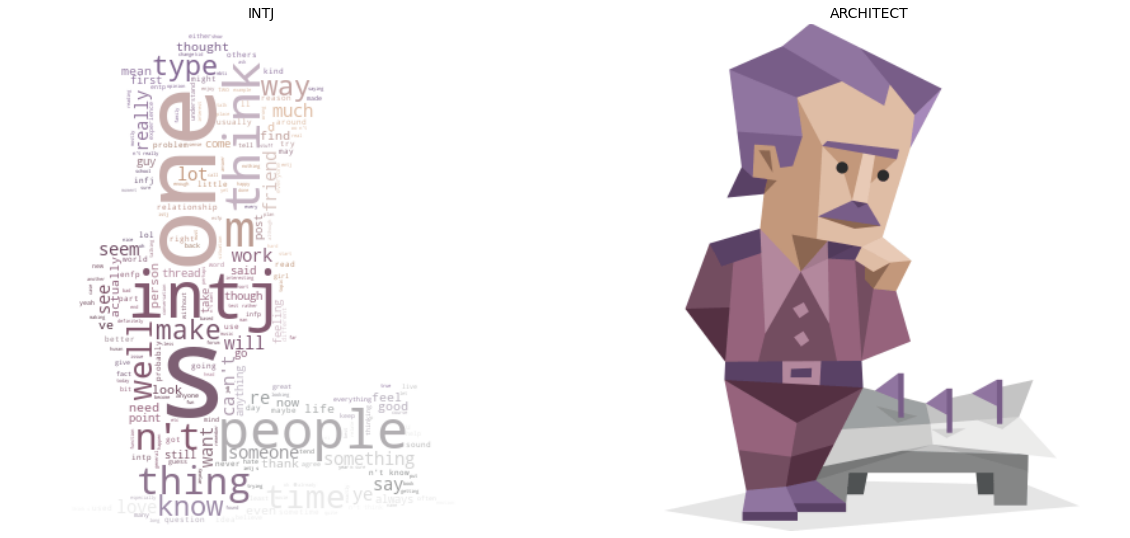

In [49]:
#INTJ Wordcloud
import cv2
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
dataFile_1 = df[df['type'] == 'INTJ']
text = str(dataFile_1['posts'].tolist())

img=cv2.imread("intj.png") #Please add your path here

rgbimg=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

INTJ_mask = np.array(rgbimg)
stopwords = set(STOPWORDS)
text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords]
wc = WordCloud(background_color="white", max_words=2000, mask=INTJ_mask,
               stopwords=stopwords)

text = (" ").join(tokens_without_sw)

# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(INTJ_mask)

# show
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.title('INTJ', loc='Center', fontsize=14)
plt.axis("off")

plt.subplot(122)
plt.imshow(INTJ_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title('ARCHITECT', loc='Center', fontsize=14)
plt.axis("off")
plt.show()

(-0.5, 399.5, 399.5, -0.5)

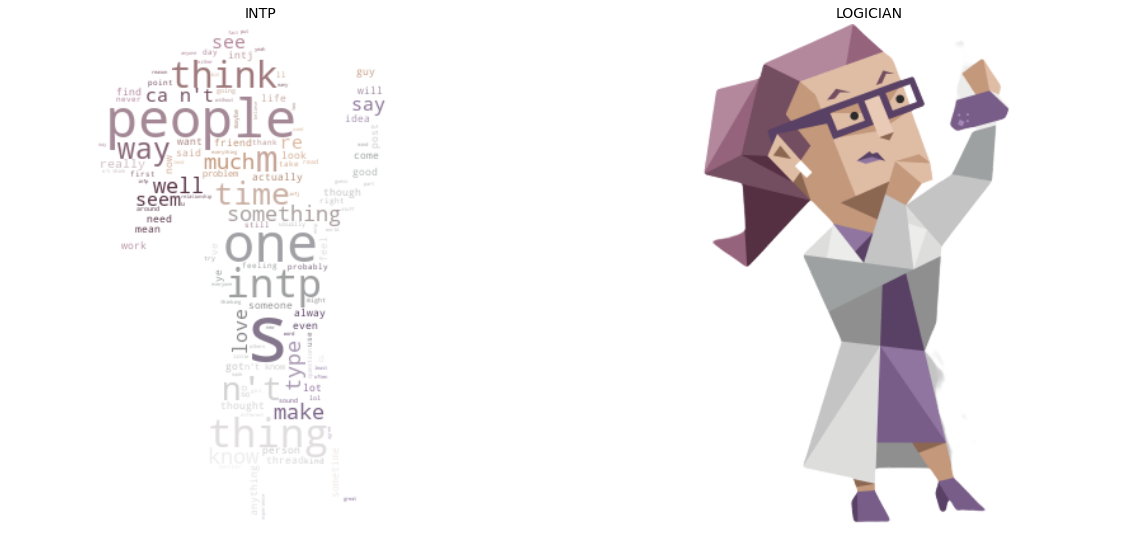

In [50]:
#INTP
import cv2
dataFile_2 = df[df['type'] == 'INTP']
text = str(dataFile_2['posts'].tolist())

img2=cv2.imread("intp-2.png") #Please add your path here

rgbimg2=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
INTP_mask = np.array(rgbimg2)
stopwords = set(STOPWORDS)

text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords]
wc = WordCloud(background_color="white", max_words=2000, mask=INTP_mask,
               stopwords=stopwords)

text = (" ").join(tokens_without_sw)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(INTP_mask)

# show
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.title('INTP', loc='Center', fontsize=14)
plt.axis("off")

plt.subplot(122)
plt.imshow(INTP_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title('LOGICIAN', loc='Center', fontsize=14)
plt.axis("off")

(-0.5, 399.5, 399.5, -0.5)

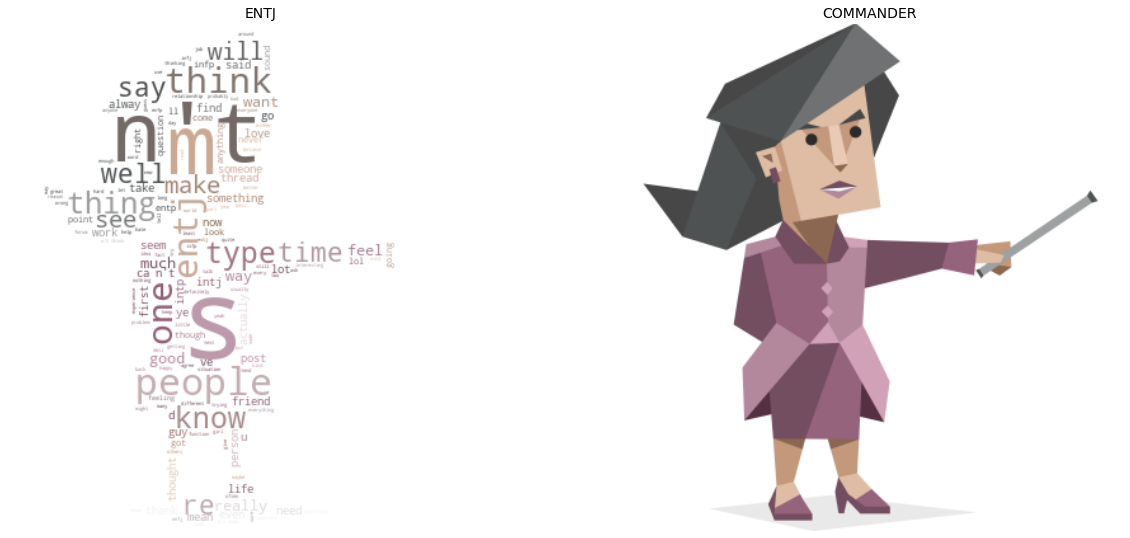

In [51]:
#ENTJ
import cv2
dataFile_3 = df[df['type'] == 'ENTJ']
text = str(dataFile_3['posts'].tolist())
img3=cv2.imread("entj.png") #Please add your path here

imgr3=cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)
ENTJ_mask = np.array(imgr3)
stopwords = set(STOPWORDS)
text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords]
wc = WordCloud(background_color="white", max_words=2000, mask=ENTJ_mask,
               stopwords=stopwords)

text = (" ").join(tokens_without_sw)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(ENTJ_mask)

# show
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.title('ENTJ', loc='Center', fontsize=14)
plt.axis("off")

plt.subplot(122)
plt.imshow(ENTJ_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title('COMMANDER', loc='Center', fontsize=14)
plt.axis("off")

(-0.5, 399.5, 399.5, -0.5)

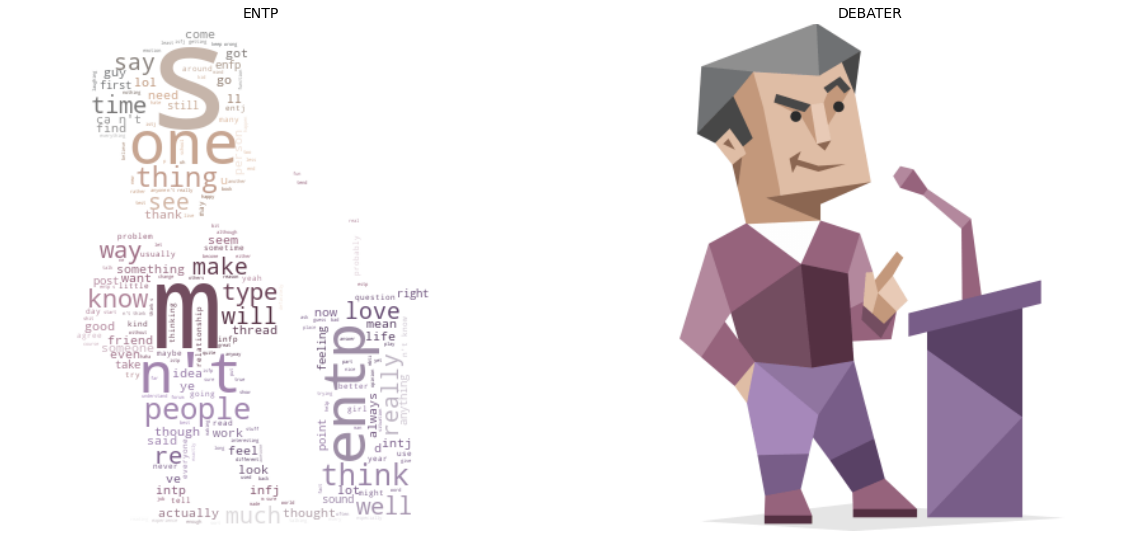

In [52]:
#ENTP
dataFile_4 = df[df['type'] == 'ENTP']
text = str(dataFile_4['posts'].tolist())
img4=cv2.imread("entp.png") #Please add your path here
imgr4=cv2.cvtColor(img4,cv2.COLOR_BGR2RGB)

ENTP_mask = np.array(imgr4)
stopwords = set(STOPWORDS)

text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords]
wc = WordCloud(background_color="white", max_words=2000, mask=ENTP_mask,
               stopwords=stopwords)

text = (" ").join(tokens_without_sw)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(ENTP_mask)

# show
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.title('ENTP', loc='Center', fontsize=14)
plt.axis("off")

plt.subplot(122)
plt.imshow(ENTP_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title('DEBATER', loc='Center', fontsize=14)
plt.axis("off")

(-0.5, 399.5, 399.5, -0.5)

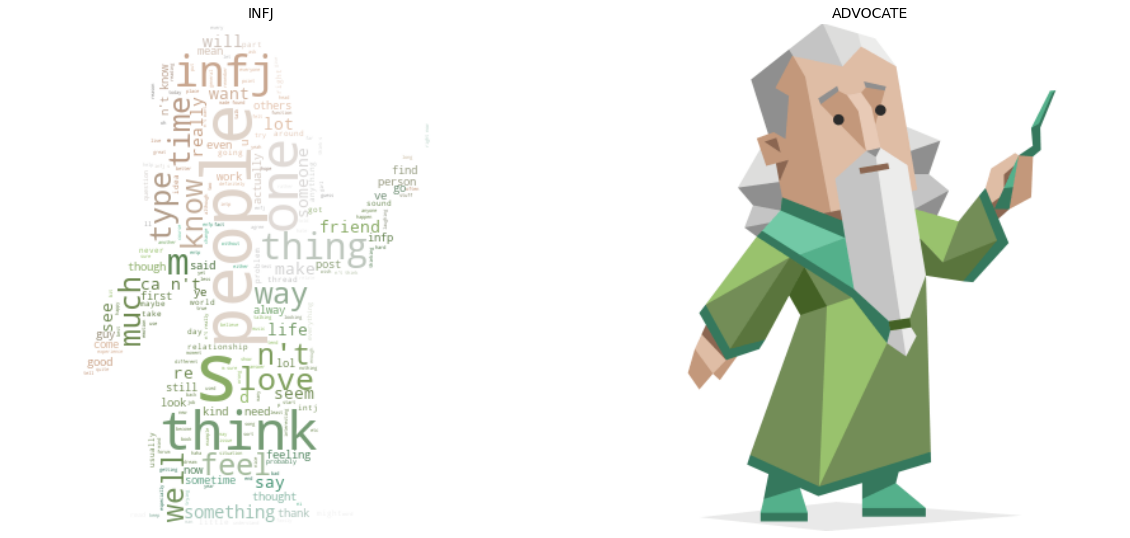

In [53]:
#INFJ
dataFile_5 = df[df['type'] == 'INFJ']
text = str(dataFile_5['posts'].tolist())
img5=cv2.imread("infj.png") #Please add your path here
imgr5=cv2.cvtColor(img5,cv2.COLOR_BGR2RGB)
INFJ_mask = np.array(imgr5)
stopwords = set(STOPWORDS)
text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords]
wc = WordCloud(background_color="white", max_words=2000, mask=INFJ_mask,
               stopwords=stopwords)

text = (" ").join(tokens_without_sw)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(INFJ_mask)

# show
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.title('INFJ', loc='Center', fontsize=14)
plt.axis("off")

plt.subplot(122)
plt.imshow(INFJ_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title('ADVOCATE', loc='Center', fontsize=14)
plt.axis("off")

(-0.5, 399.5, 399.5, -0.5)

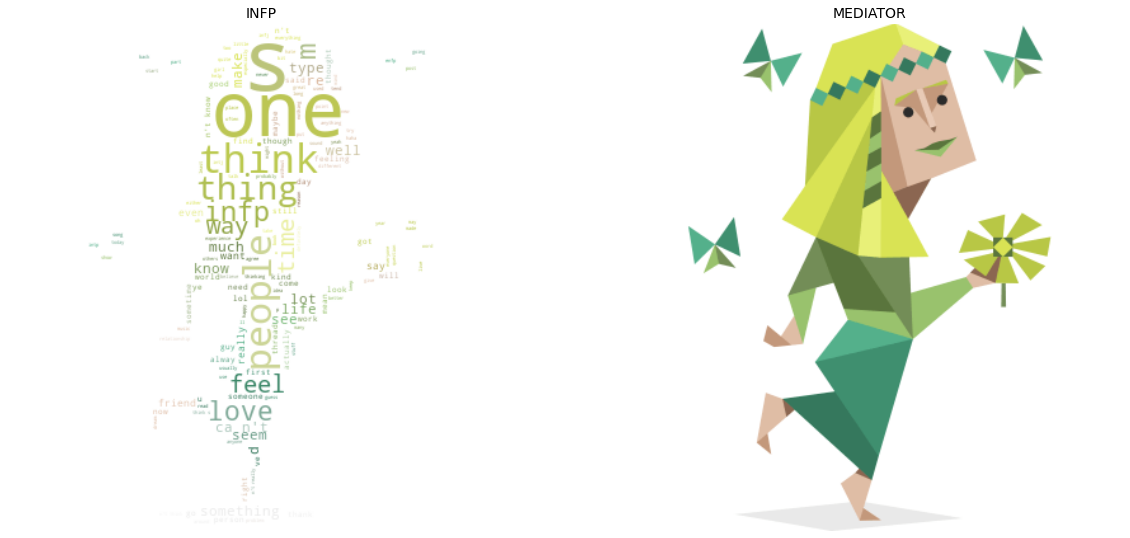

In [54]:
#INFP
dataFile_6 = df[df['type'] == 'INFP']
text = str(dataFile_6['posts'].tolist())
img6=cv2.imread("infp.png") #Please add your path here
imgr6=cv2.cvtColor(img6,cv2.COLOR_BGR2RGB)
INFP_mask = np.array(imgr6)
stopwords = set(STOPWORDS)

text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords]
wc = WordCloud(background_color="white", max_words=2000, mask=INFP_mask,
               stopwords=stopwords)

text = (" ").join(tokens_without_sw)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(INFP_mask)

# show
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.title('INFP', loc='Center', fontsize=14)
plt.axis("off")

plt.subplot(122)
plt.imshow(INFP_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title('MEDIATOR', loc='Center', fontsize=14)
plt.axis("off")


(-0.5, 399.5, 399.5, -0.5)

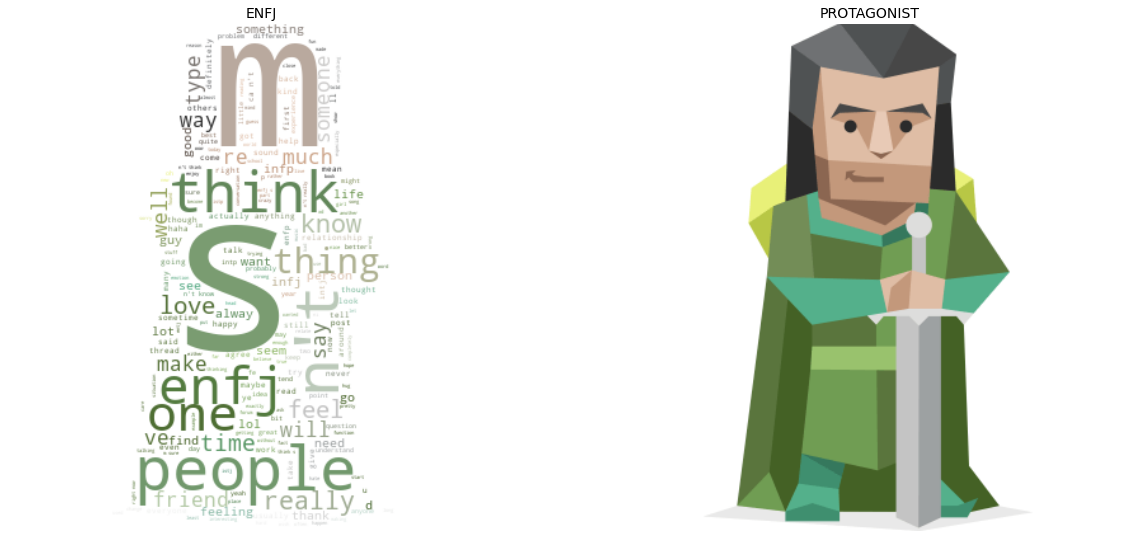

In [55]:
#ENFJ
dataFile_7 = df[df['type'] == 'ENFJ']
text = str(dataFile_7['posts'].tolist())
img7=cv2.imread("enfj.png") #Please add your path here
imgr7=cv2.cvtColor(img7,cv2.COLOR_BGR2RGB)
ENFJ_mask = np.array(imgr7)
stopwords = set(STOPWORDS)

text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords]
wc = WordCloud(background_color="white", max_words=2000, mask=ENFJ_mask,
               stopwords=stopwords)

text = (" ").join(tokens_without_sw)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(ENFJ_mask)

# show
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.title('ENFJ', loc='Center', fontsize=14)
plt.axis("off")

plt.subplot(122)
plt.imshow(ENFJ_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title('PROTAGONIST', loc='Center', fontsize=14)
plt.axis("off")


(-0.5, 399.5, 399.5, -0.5)

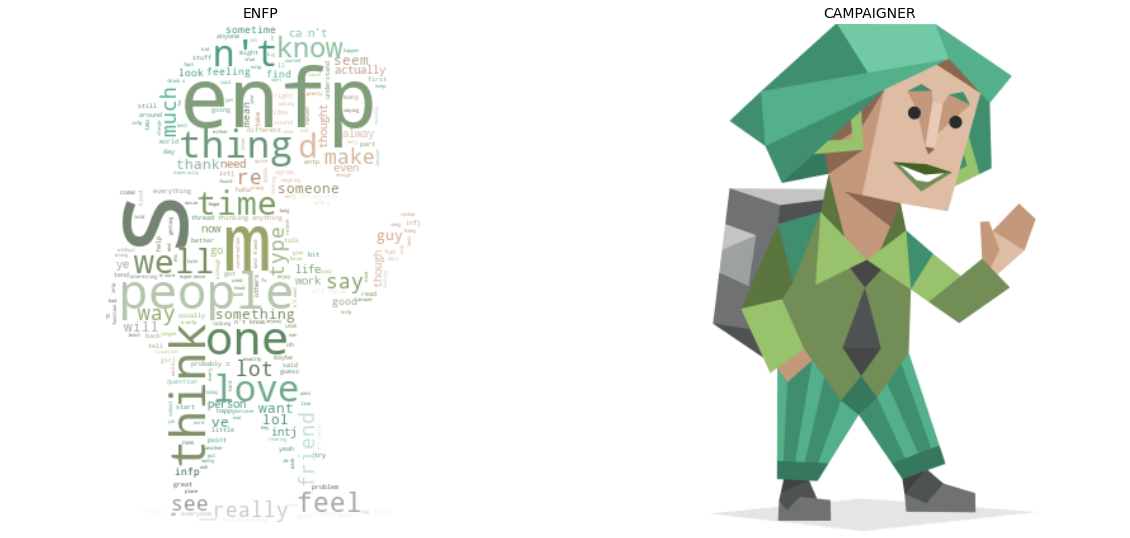

In [56]:
#ENFP
dataFile_8 = df[df['type'] == 'ENFP']
text = str(dataFile_8['posts'].tolist())
img8=cv2.imread("enfp.png") #Please add your path here
imgr8=cv2.cvtColor(img8,cv2.COLOR_BGR2RGB)
ENFP_mask = np.array(imgr8)
stopwords = set(STOPWORDS)
text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords]
wc = WordCloud(background_color="white", max_words=2000, mask=ENFP_mask,
               stopwords=stopwords)

text = (" ").join(tokens_without_sw)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(ENFP_mask)

# show
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.title('ENFP', loc='Center', fontsize=14)
plt.axis("off")

plt.subplot(122)
plt.imshow(ENFP_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title('CAMPAIGNER', loc='Center', fontsize=14)
plt.axis("off")


(-0.5, 399.5, 399.5, -0.5)

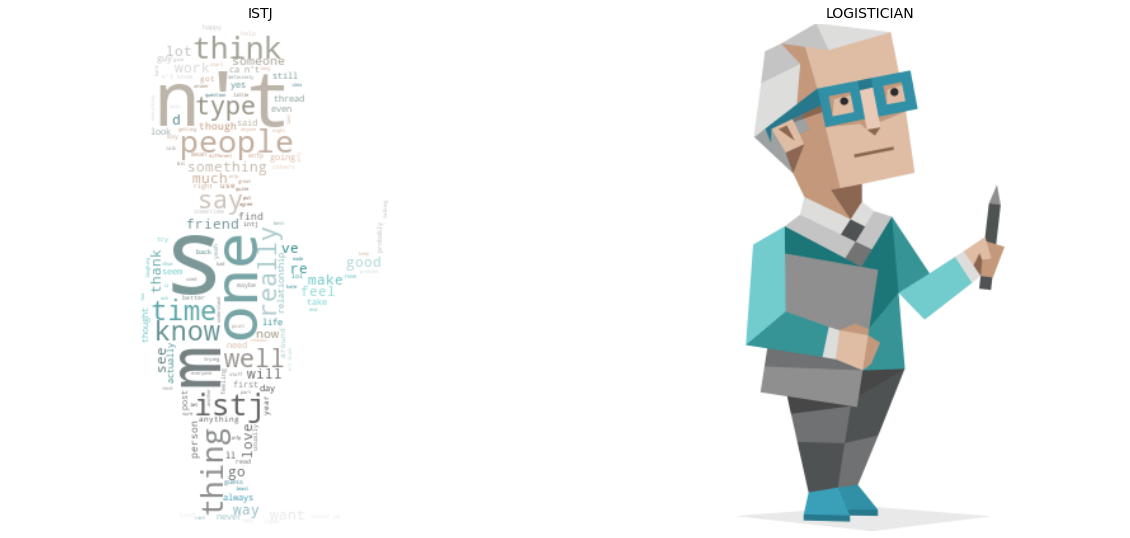

In [57]:
#ISTJ
dataFile_9 = df[df['type'] == 'ISTJ']
text = str(dataFile_9['posts'].tolist())
img9=cv2.imread("istj.png") #Please add your path here
imgr9=cv2.cvtColor(img9,cv2.COLOR_BGR2RGB)
ISTJ_mask = np.array(imgr9)
stopwords = set(STOPWORDS)

text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords]
wc = WordCloud(background_color="white", max_words=2000, mask=ISTJ_mask,
               stopwords=stopwords)

text = (" ").join(tokens_without_sw)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(ISTJ_mask)

# show
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.title('ISTJ', loc='Center', fontsize=14)
plt.axis("off")

plt.subplot(122)
plt.imshow(ISTJ_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title('LOGISTICIAN', loc='Center', fontsize=14)
plt.axis("off")


(-0.5, 399.5, 399.5, -0.5)

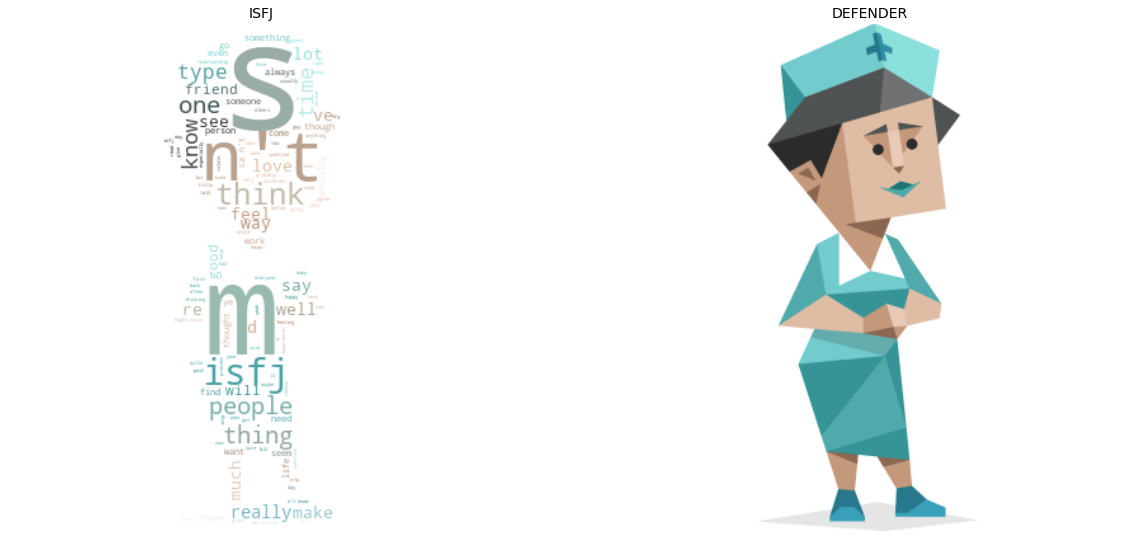

In [58]:
#ISFJ
dataFile_10 = df[df['type'] == 'ISFJ']
text = str(dataFile_10['posts'].tolist())
img10=cv2.imread("isfj.png") #Please add your path here
imgr10=cv2.cvtColor(img10,cv2.COLOR_BGR2RGB)
ISFJ_mask = np.array(imgr10)
stopwords = set(STOPWORDS)

text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords]
wc = WordCloud(background_color="white", max_words=2000, mask=ISFJ_mask,
               stopwords=stopwords)

text = (" ").join(tokens_without_sw)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(ISFJ_mask)

# show
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.title('ISFJ', loc='Center', fontsize=14)
plt.axis("off")

plt.subplot(122)
plt.imshow(ISFJ_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title('DEFENDER', loc='Center', fontsize=14)
plt.axis("off")



(-0.5, 399.5, 399.5, -0.5)

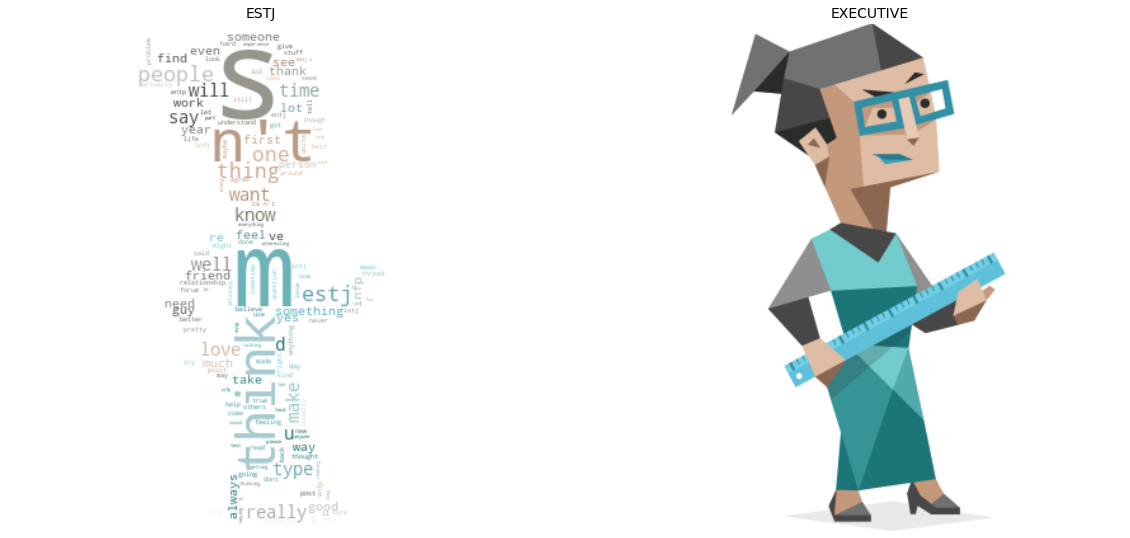

In [59]:
#ESTJ
dataFile_11 = df[df['type'] == 'ESTJ']
text = str(dataFile_11['posts'].tolist())
img11=cv2.imread("estj.png") #Please add your path here
imgr11=cv2.cvtColor(img11,cv2.COLOR_BGR2RGB)
ESTJ_mask = np.array(imgr11)
stopwords = set(STOPWORDS)

text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords]
wc = WordCloud(background_color="white", max_words=2000, mask=ESTJ_mask,
               stopwords=stopwords)

text = (" ").join(tokens_without_sw)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(ESTJ_mask)

# show
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.title('ESTJ', loc='Center', fontsize=14)
plt.axis("off")

plt.subplot(122)
plt.imshow(ESTJ_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title('EXECUTIVE', loc='Center', fontsize=14)
plt.axis("off")



(-0.5, 399.5, 399.5, -0.5)

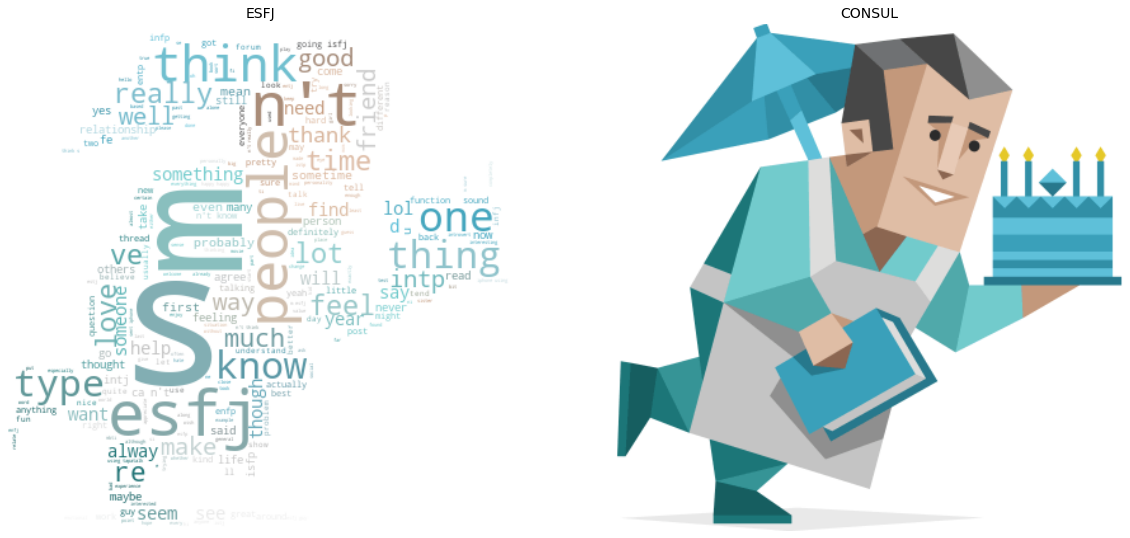

In [60]:
#ESFJ
dataFile_12 = df[df['type'] == 'ESFJ']
text = str(dataFile_12['posts'].tolist())
img12=cv2.imread("esfj.png") #Please add your path here
imgr12=cv2.cvtColor(img12,cv2.COLOR_BGR2RGB)
ESFJ_mask = np.array(imgr12)
stopwords = set(STOPWORDS)

text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords]
wc = WordCloud(background_color="white", max_words=2000, mask=ESFJ_mask,
               stopwords=stopwords)

text = (" ").join(tokens_without_sw)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(ESFJ_mask)

# show
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.title('ESFJ', loc='Center', fontsize=14)
plt.axis("off")

plt.subplot(122)
plt.imshow(ESFJ_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title('CONSUL', loc='Center', fontsize=14)
plt.axis("off")



(-0.5, 399.5, 399.5, -0.5)

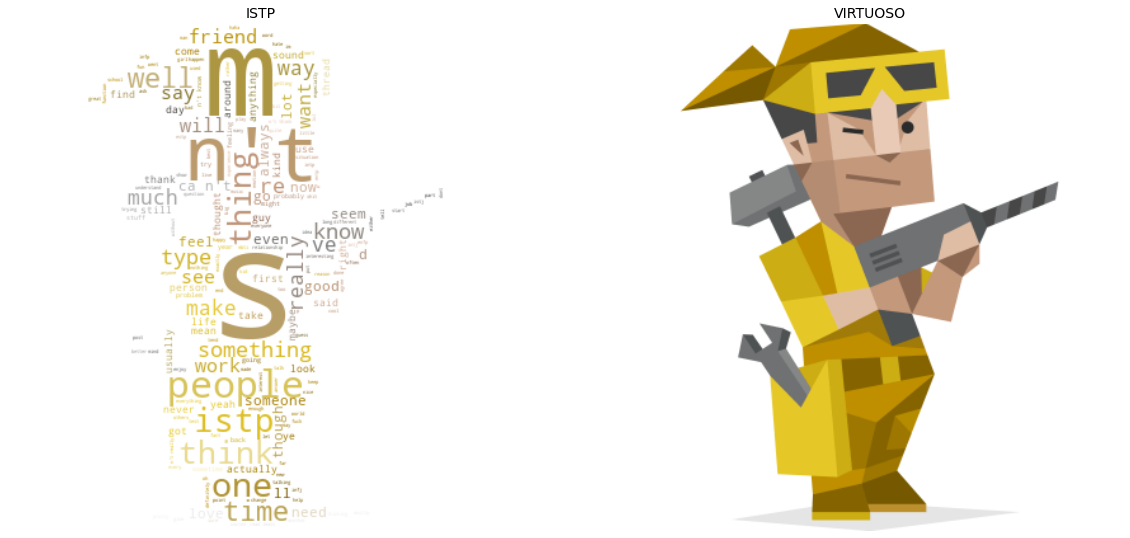

In [61]:
#ISTP
dataFile_13 = df[df['type'] == 'ISTP']
text = str(dataFile_13['posts'].tolist())
img13=cv2.imread("istp.png") #Please add your path here
imgr13=cv2.cvtColor(img13,cv2.COLOR_BGR2RGB)
ISTP_mask = np.array(imgr13)
stopwords = set(STOPWORDS)

text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords]
wc = WordCloud(background_color="white", max_words=2000, mask=ISTP_mask,
               stopwords=stopwords)

text = (" ").join(tokens_without_sw)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(ISTP_mask)

# show
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.title('ISTP', loc='Center', fontsize=14)
plt.axis("off")

plt.subplot(122)
plt.imshow(ISTP_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title('VIRTUOSO', loc='Center', fontsize=14)
plt.axis("off")


(-0.5, 399.5, 399.5, -0.5)

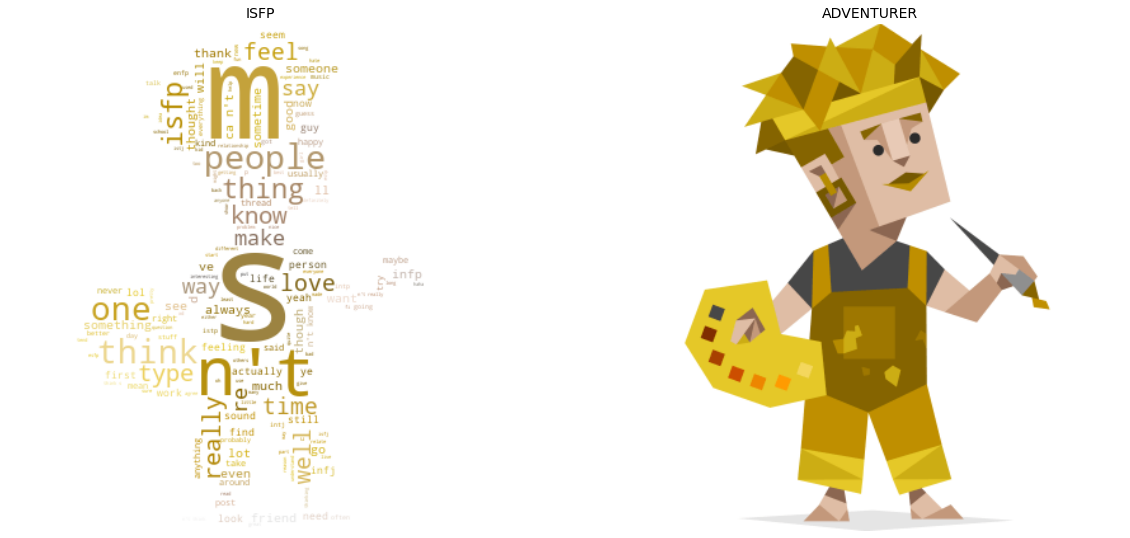

In [62]:
#ISFP
dataFile_14 = df[df['type'] == 'ISFP']
text = str(dataFile_14['posts'].tolist())
img14=cv2.imread("isfp.png")#Please add your path here
imgr14=cv2.cvtColor(img14,cv2.COLOR_BGR2RGB)
ISFP_mask = np.array(imgr14)
stopwords = set(STOPWORDS)

text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords]
wc = WordCloud(background_color="white", max_words=2000, mask=ISFP_mask,
               stopwords=stopwords)

text = (" ").join(tokens_without_sw)2
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(ISFP_mask)

# show
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.title('ISFP', loc='Center', fontsize=14)
plt.axis("off")

plt.subplot(122)
plt.imshow(ISFP_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title('ADVENTURER', loc='Center', fontsize=14)
plt.axis("off")

(-0.5, 399.5, 399.5, -0.5)

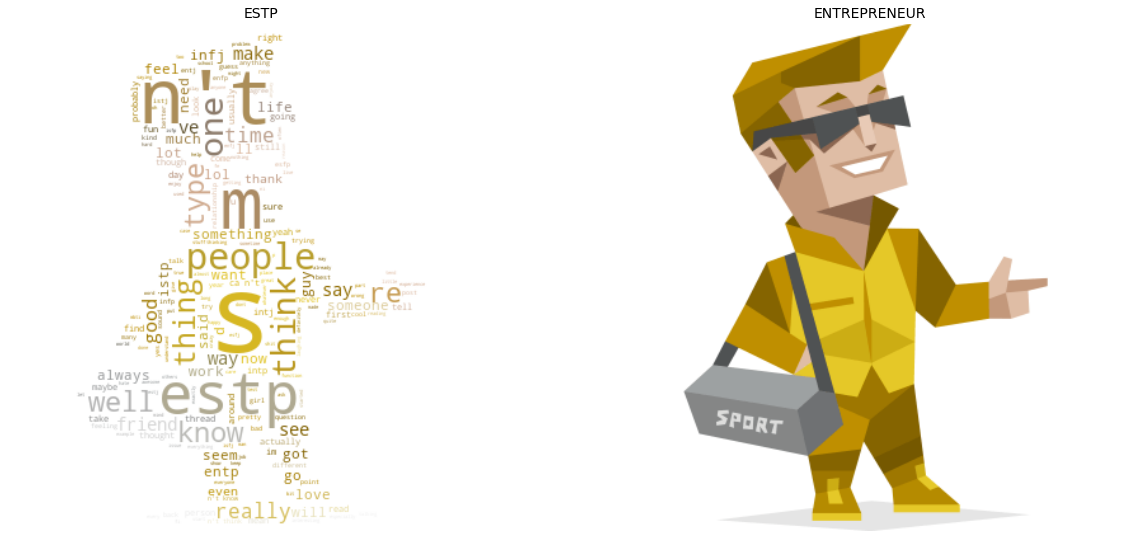

In [63]:
#ESTP
dataFile_15 = df[df['type'] == 'ESTP']
text = str(dataFile_15['posts'].tolist())
img15=cv2.imread("estp.png")#Please add your path here
imgr15=cv2.cvtColor(img15,cv2.COLOR_BGR2RGB)
ESTP_mask = np.array(imgr15)
stopwords = set(STOPWORDS)

text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords]
wc = WordCloud(background_color="white", max_words=2000, mask=ESTP_mask,
               stopwords=stopwords)

text = (" ").join(tokens_without_sw)

# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(ESTP_mask)

# show
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.title('ESTP', loc='Center', fontsize=14)
plt.axis("off")

plt.subplot(122)
plt.imshow(ESTP_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title('ENTREPRENEUR', loc='Center', fontsize=14)
plt.axis("off")

(-0.5, 399.5, 399.5, -0.5)

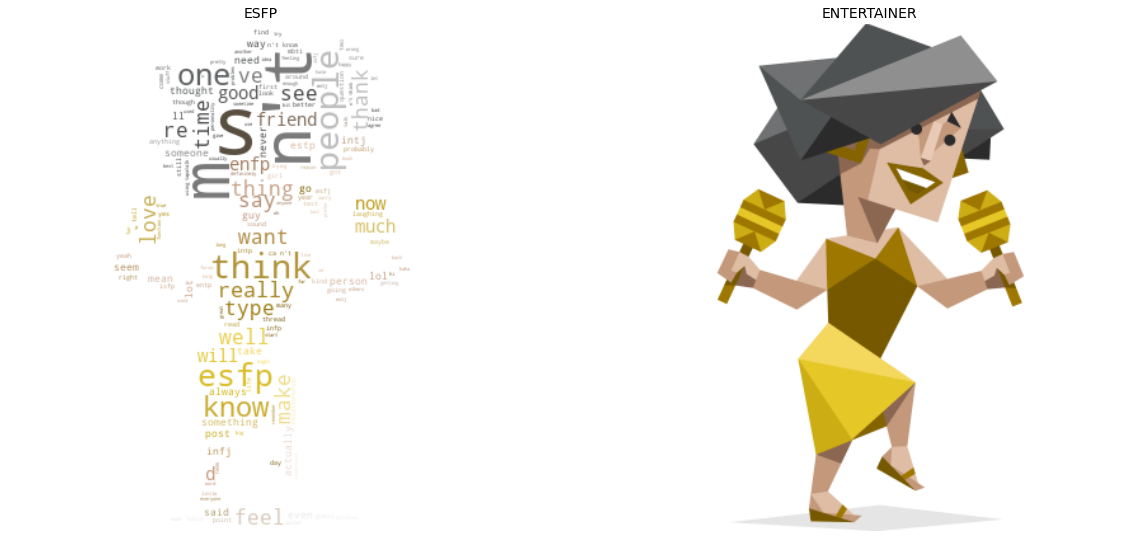

In [64]:
#ESFP
from nltk.tokenize import word_tokenize
dataFile_16 = df[df['type'] == 'ESFP']
text = str(dataFile_16['posts'].tolist())
img16=cv2.imread("esfp.png") #Please add your path here
imgr16=cv2.cvtColor(img16,cv2.COLOR_BGR2RGB)
ESFP_mask = np.array(imgr16)
stopwords = set(STOPWORDS)

text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords]
wc = WordCloud(background_color="white", max_words=2000, mask=ESFP_mask,
               stopwords=stopwords)

text = (" ").join(tokens_without_sw)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(ESFP_mask)

# show
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.title('ESFP', loc='Center', fontsize=14)
plt.axis("off")

plt.subplot(122)
plt.imshow(ESFP_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title('ENTERTAINER', loc='Center', fontsize=14)
plt.axis("off")


In [68]:
#INTJ Wordcloud
import cv2
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
dataFile_1 = df[df['type'] == 'INTJ']
text = str(dataFile_1['posts'].tolist())

img=cv2.imread("intj.png") #Please add your path here

rgbimg=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

INTJ_mask = np.array(rgbimg)
stopwords = set(STOPWORDS)
text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords]
wc = WordCloud(background_color="white", max_words=2000, mask=INTJ_mask,
               stopwords=stopwords)

text = (" ").join(tokens_without_sw)

# generate word cloud
wc.generate(text)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

